<a href="https://colab.research.google.com/github/soyeunju/ESAA/blob/main/0307_Week1_HW_HOM_ModelTraining_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 4.5 규제가 있는 선형 모델

과대적합을 감소시키는 좋은 방법은 모델을 규제하는 것(자유도를 줄이면 과대적합되기 어려워짐).

### 4.5.1 릿지 회귀

규제항이 비용함수에 추가된 선형 회귀.

규제항 : $αΣ_{i=1}^{n}\theta^2$

모델의 가중치가 가능한 작게 유지되게 함. 훈련 과정에서 비용 함수에 추가되고, 훈련이 끝나면 모델의 성능을 규제가 없는 성능 지표로 평가.

📈 4-8 릿지 회귀의 비용 함수

$J(\theta) = MSE(\theta) + αΣ_{i=1}^{n}\theta^2$

* 편항 $\theta_0$ 는 규제되지 않음
* **w** 가중치 벡터
* L2 노름 : $||w \|_2 = \sqrt{w_1^2 + w_2^2 + \dots + w_n^2}$
* 릿지 회귀는 입력 특성의 스케일에 민감하기 때문에 수행하기 전에 데이터 스케일을 맞추는 것이 중요(StandardScaler)

📈 4-9 릿지 회귀의 정규방정식

$\hat{\theta} = (X^TX + \alpha A)^{-1}X^T y$

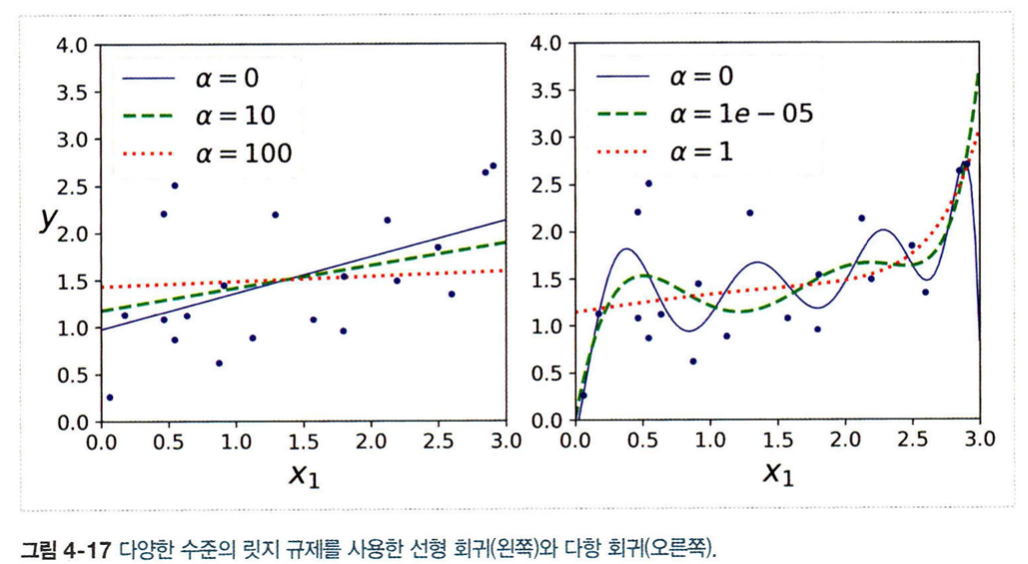

a를 증가시킬수록 직선에 가까워짐. 분산 ⬇️, 편향 ⬆️

In [ ]:
# 4.5.1 릿지 회귀
import numpy as np
m = 100
X = 6 * np.random.rand(m,1)-3
y = 0.5 * X **2 + X + 2 + np.random.randn(m,1)

# 사이킷런 정규방정식
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 1, solver = 'cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([5.18772094])

In [ ]:
# 확률적 경사 하강법
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty = 'l2')
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([5.18280005])

### 4.5.2 라쏘 회귀

릿지 회귀처럼 비용함수에 규제항을 더함. 덜 중요한 특징의 가중치를 제거하려고 함(가중치 0). 즉, 라쏘 회귀는 자동적으로 특성 선택을 하고, 희소 모델을 만듦.

📈 4-10 라쏘 회귀의 비용 함수

$J(\theta) = MSE(\theta) + αΣ_{i=1}^{n}|\theta_i|$

* 편항 $\theta_0$ 는 규제되지 않음
* L1 노름 : $|w| = {|w_1| + |w_2| + \dots + |w_n|}$


라쏘를 사용할 때 경사 하강법이 최적점 근처에서 진동하는 것을 막으려면 훈련하는 동안 점진적으로 학습률을 감소시켜야 함.

라쏘의 비용 함수는 $\theta_i = 0$에서 미분 불가. 서브그레이디언트 벡터 **g**를 사용하면 경사하강법 적용 가능.

📈 4-11 라쏘 회귀의 서브그레이디언트 벡터

$g(\theta,J) = \nabla_\theta MSE(\theta) + \alpha \begin{bmatrix}
sign(\theta_1)\\  
sign(\theta_2)\\
\vdots \\
sign(\theta_n)\\
\end{bmatrix}$

In [ ]:
# 4.5.2 라쏘 회귀
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([5.14902609])

### 4.5.3 엘라스틱넷

릿지 회귀와 라쏘 회귀를 절충한 모델

📈 4-11 엘라스틱넷 비용 함수

$J(\theta) = MSE(\theta) + rαΣ_{i=1}^{n}|\theta_i| + \frac{1-r}{α}Σ_{i=1}^{n}\theta^2$



In [ ]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5) # l1_ratio : 혼합 비율 r
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([5.14702791])

릿지, 라쏘, 엘라스틱넷 각각 언제 사용할까?

릿지가 기본이 되지만, 쓰이는 특성이 몇 개뿐이라고 의심되면 라쏘나 엘라스틱넷이 더 나음.

특성 수가 훈련 샘플 수보다 많거나 특성 몇 개가 강하게 연관되어 있으면 라쏘보다는 엘라스틱넷 활용.

### 4.5.4 조기 종료

경사하강법과 같은 반복적인 알고리즘을 규제하는 방법은 검증 에러가 최솟값에 도달하면 바로 훈련을 중지하는 것.

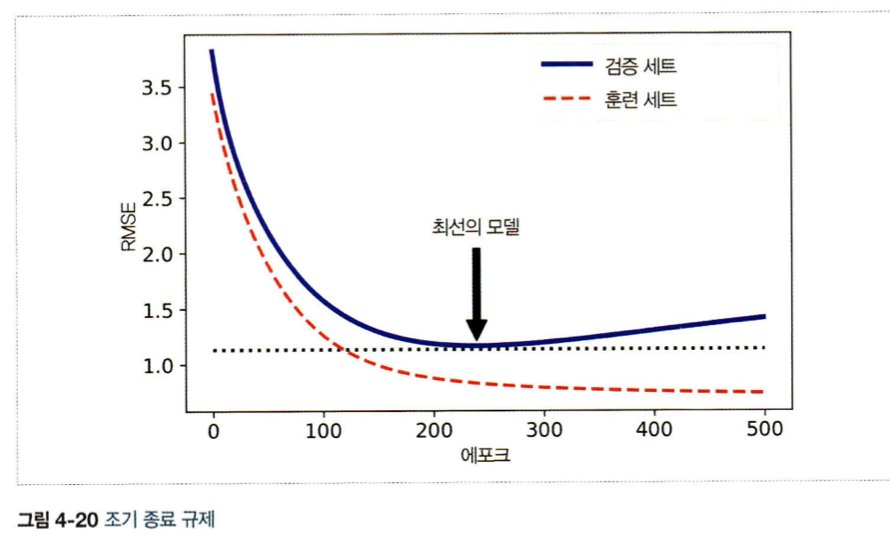

In [ ]:
from sklearn.base import clone
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2)

# 데이터 준비
poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree = 90, include_bias = False)),
    ('std_scaler', StandardScaler())])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter = 1, tol = None, warm_start = True, penalty = None, learning_rate = 'constant', eta0 = 0.0005)

minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled, y_train)
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val, y_val_predict)
  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)

# clone은 sklearn.base.colne 함수로, 기존 모델의 구조와 하이퍼파리미터를 동일하게 복사하지만, 학습된 가중치는 초기화된 새로운 객체를 생성하는 역할을 한다.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

## 4.6 로지스틱 회귀

: 분류에서 사용. 샘플이 특정 클래스에 속할 확률을 추정하는 데 쓰임.

### 4.6.1 확률 추정

입력 특성의 가중치 합을 계산(편항도 더함)

📈 4-13 로지스틱 회귀 모델의 확률 추정(벡터 표현식)

$\hat{p} = h_\theta(x) = σ(\theta^Tx)$

* 로지스틱 σ($\cdot$) 은 0과 1사이의 값을 출력하는 시그모이드 함수.

📈 4-14 로지스틱 함수

$\sigma(t) = \frac{1}{1+exp^{-t}}$

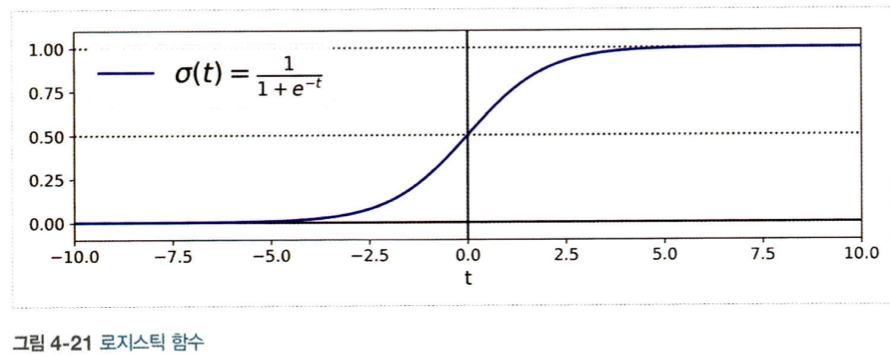

📈 4-15 로지스틱 회귀 모델 예측
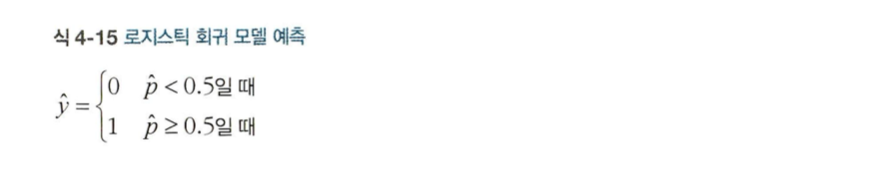

### 4.6.2 훈련과 비용 함수

훈련의 목적은 양성 샘플에 대해서는 높은 확률을 추정하고 음성 샘플에 대해서는 낮은 확률을 추정하는 모델 파라미터 벡터 $\theta$를 찾는 것

📈 4-16 하나의 훈련 샘플에 대한 비용 함수

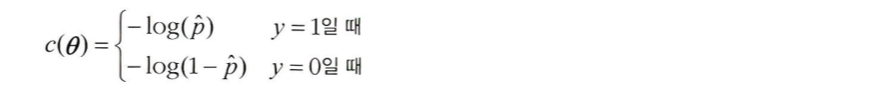

📈 4-17 로지스틱 회귀의 비용 함수(로그 손실)
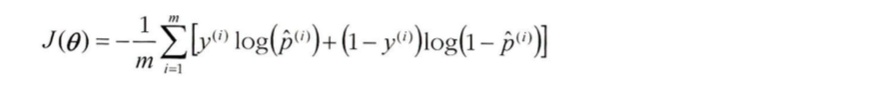

### 4.6.3 결정 경계

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
X = iris.data[:,3:] # petal width
y = (iris['target']==2).astype('int') # Iris-virginica면 1, 그렇지 않으면 0

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

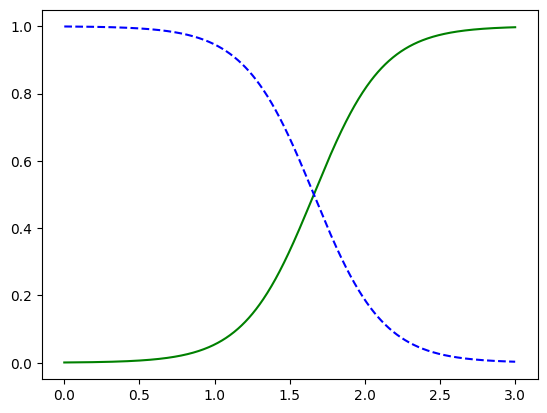

In [ ]:
import matplotlib.pyplot as plt
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new,y_proba[:,1],'g-',label = 'Iris virginica')
plt.plot(X_new,y_proba[:,0],'b--',label = 'Not Iris virginica')
plt.show()

In [ ]:
log_reg.predict([[1.7],
                  [1.5]])

array([1, 0])

### 4.6.4 소프트맥스 회귀(다항 로지스틱 회귀)


In [ ]:
X = iris['data'][:,(2,3)] # petal length (cm), petal width (cm)
y = iris['target']

softmax_reg = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', C = 10)
softmax_reg.fit(X,y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=10, multi_class='multinomial')

In [ ]:
softmax_reg.predict([[5,2]])

array([2])

In [ ]:
softmax_reg.predict_proba([[5,2]])

array([[6.21626375e-07, 5.73689803e-02, 9.42630398e-01]])